<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(0_8)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.8_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,52.165738,11.468609,73.634347,61.898645,11.735702
1,0.0,1.0,97.995210,-5.613893,102.381318,106.602304,-4.220986
2,0.0,2.0,78.654944,-4.637278,84.017666,87.737137,-3.719471
3,0.0,3.0,85.490441,1.978314,97.468755,94.404717,3.064037
4,0.0,4.0,45.689186,3.063539,58.752726,55.581192,3.171534
...,...,...,...,...,...,...,...
59995,999.0,55.0,69.579291,4.145279,83.724569,78.288762,5.435808
59996,999.0,56.0,62.459660,-1.037521,71.422140,71.374481,0.047659
59997,999.0,57.0,44.052724,-6.621296,47.431428,53.498452,-6.067023
59998,999.0,58.0,37.902249,3.891815,51.794064,47.525373,4.268691


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    52.165738  11.468609   73.634347   61.898645  11.735702
      1.0    97.995210  -5.613893  102.381318  106.602304  -4.220986
      2.0    78.654944  -4.637278   84.017666   87.737137  -3.719471
      3.0    85.490441   1.978314   97.468755   94.404717   3.064037
      4.0    45.689186   3.063539   58.752726   55.581192   3.171534
...                ...        ...         ...         ...        ...
999.0 55.0   69.579291   4.145279   83.724569   78.288762   5.435808
      56.0   62.459660  -1.037521   71.422140   71.374481   0.047659
      57.0   44.052724  -6.621296   47.431428   53.498452  -6.067023
      58.0   37.902249   3.891815   51.794064   47.525373   4.268691
      59.0   26.873652  -1.756043   35.117610   36.814871  -1.697261

[60000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    52.165738  11.468609   73.634347   61.898645  11.735702
      1.0    97.995210  -5.613893  102.381318  106.602304  -4.220986
      2.0    78.654944  -4.637278   84.017666   87.737137  -3.719471
      3.0    85.490441   1.978314   97.468755   94.404717   3.064037
      4.0    45.689186   3.063539   58.752726   55.581192   3.171534
...                ...        ...         ...         ...        ...
999.0 55.0   69.579291   4.145279   83.724569   78.288762   5.435808
      56.0   62.459660  -1.037521   71.422140   71.374481   0.047659
      57.0   44.052724  -6.621296   47.431428   53.498452  -6.067023
      58.0   37.902249   3.891815   51.794064   47.525373   4.268691
      59.0   26.873652  -1.756043   35.117610   36.814871  -1.697261

[60000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,52.165738,11.468609,73.634347,61.898645,11.735702
1,0.0,1.0,97.995210,-5.613893,102.381318,106.602304,-4.220986
2,0.0,2.0,78.654944,-4.637278,84.017666,87.737137,-3.719471
3,0.0,3.0,85.490441,1.978314,97.468755,94.404717,3.064037
4,0.0,4.0,45.689186,3.063539,58.752726,55.581192,3.171534
...,...,...,...,...,...,...,...
59995,999.0,55.0,69.579291,4.145279,83.724569,78.288762,5.435808
59996,999.0,56.0,62.459660,-1.037521,71.422140,71.374481,0.047659
59997,999.0,57.0,44.052724,-6.621296,47.431428,53.498452,-6.067023
59998,999.0,58.0,37.902249,3.891815,51.794064,47.525373,4.268691


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    52.165738  11.468609   73.634347   61.898645  11.735702
      1.0    97.995210  -5.613893  102.381318  106.602304  -4.220986
      2.0    78.654944  -4.637278   84.017666   87.737137  -3.719471
      3.0    85.490441   1.978314   97.468755   94.404717   3.064037
      4.0    45.689186   3.063539   58.752726   55.581192   3.171534
...                ...        ...         ...         ...        ...
999.0 55.0   69.579291   4.145279   83.724569   78.288762   5.435808
      56.0   62.459660  -1.037521   71.422140   71.374481   0.047659
      57.0   44.052724  -6.621296   47.431428   53.498452  -6.067023
      58.0   37.902249   3.891815   51.794064   47.525373   4.268691
      59.0   26.873652  -1.756043   35.117610   36.814871  -1.697261

[60000 rows x 5 columns]

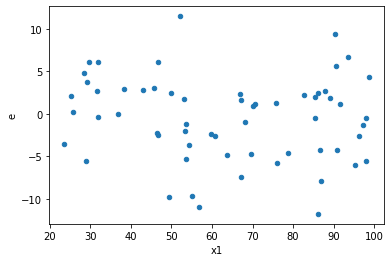

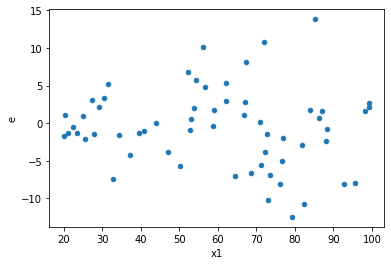

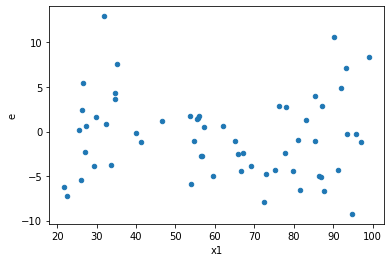

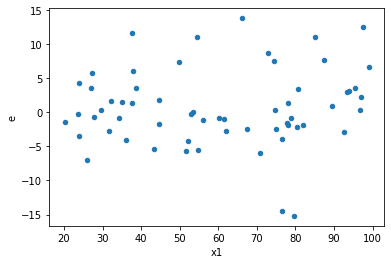

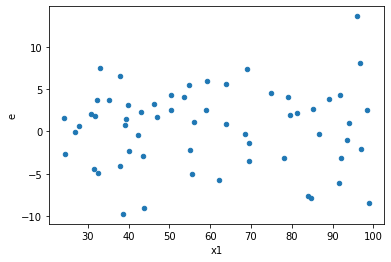

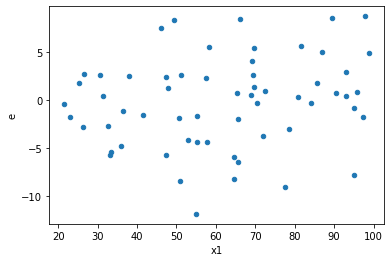

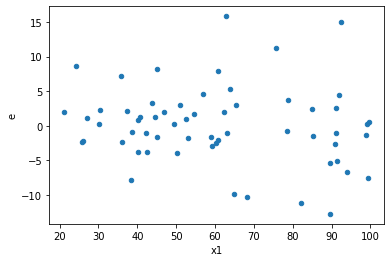

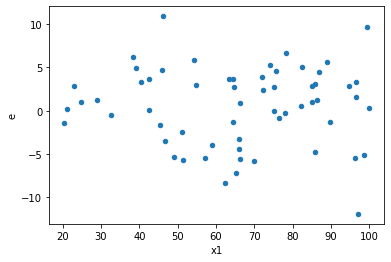

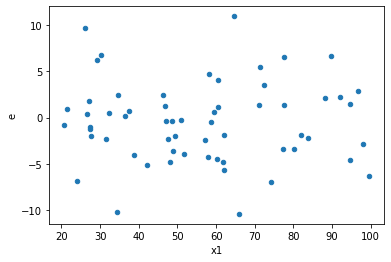

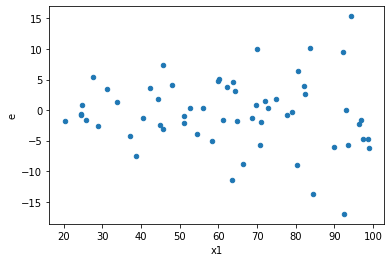

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,30.0,28.0,653.6705812926779,656.8000238571777,21.789019376422594,23.45714370918492,1.0765580269558788,0.8474221251749143,0.5762889374125428,0.42371106258745717,Reject001=1 : Homoscedasticity
5.0,28.0,30.0,581.493786269495,644.2371473259939,20.767635223910535,21.47457157753313,1.0340402913476001,0.9254178705803311,0.5372910647098345,0.46270893529016555,Reject001=1 : Homoscedasticity
7.0,21.0,37.0,382.2903966172315,792.7381426413734,18.20430460082055,21.425355206523605,1.176938953524095,0.6480038774957069,0.6759980612521466,0.32400193874785344,Reject001=1 : Homoscedasticity
9.0,23.0,35.0,275.8708475798416,1615.2832955267252,11.994384677384417,46.15095130076357,3.847713120939155,0.00034460257310242604,0.9998276987134488,0.00017230128655121302,Reject001=0 : Heteroscedasticity
10.0,23.0,35.0,351.2890664513488,1249.3660078929404,15.273437671797774,35.69617165408401,2.3371406242090855,0.022860182473958712,0.9885699087630206,0.011430091236979356,Reject001=1 : Homoscedasticity
11.0,32.0,26.0,480.33049974048447,720.9448803580998,15.01032811689014,27.7286492445423,1.847304671064523,0.11234690688520077,0.9438265465573996,0.056173453442600385,Reject001=1 : Homoscedasticity
15.0,30.0,28.0,385.1935033164412,560.3020985342187,12.839783443881373,20.010789233364953,1.5584989669666762,0.2412789646786564,0.8793605176606718,0.1206394823393282,Reject001=1 : Homoscedasticity
17.0,27.0,31.0,662.5695192564021,909.0231685215422,24.53961182431119,29.32332801682394,1.194938543721118,0.62871388720755,0.685643056396225,0.314356943603775,Reject001=1 : Homoscedasticity
18.0,33.0,25.0,736.1052882742603,768.9746376002963,22.306220856795765,30.758985504011854,1.3789420315293295,0.4098052035137114,0.7950973982431443,0.2049026017568557,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,30.0,28.0,653.6705812926779,656.8000238571777,21.789019376422594,23.45714370918492,1.0765580269558788,0.8474221251749143,Reject001=1 : Homoscedasticity
1.0,32.0,26.0,1178.1377757037446,354.9049815899619,36.81680549074202,13.650191599613919,0.37075980432485933,0.008305076967173463,Reject001=0 : Heteroscedasticity
2.0,30.0,28.0,621.9822716070487,540.51220052286,20.732742386901624,19.304007161530713,0.93108797675152,0.845517630854916,Reject001=1 : Homoscedasticity
3.0,30.0,28.0,1191.3028835758848,629.4919197014419,39.71009611919616,22.481854275051496,0.5661495808916867,0.12928588878871614,Reject001=1 : Homoscedasticity
4.0,26.0,32.0,727.187603327924,549.3898274255089,27.96875397415092,17.168432107047153,0.6138432953757768,0.20552555265676795,Reject001=1 : Homoscedasticity
5.0,28.0,30.0,581.493786269495,644.2371473259939,20.767635223910535,21.47457157753313,1.0340402913476001,0.9254178705803311,Reject001=1 : Homoscedasticity
6.0,19.0,39.0,926.0657741836887,829.921873051607,48.74030390440467,21.280048026964284,0.43660064304689744,0.055511901180987575,Reject001=1 : Homoscedasticity
7.0,21.0,37.0,382.2903966172315,792.7381426413734,18.20430460082055,21.425355206523605,1.176938953524095,0.6480038774957069,Reject001=1 : Homoscedasticity
8.0,30.0,28.0,670.888059498715,423.9199098741554,22.362935316623837,15.139996781219835,0.6770129487413614,0.2964850666480069,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      860
Reject001=0 : Heteroscedasticity    140
Name: Result_test, dtype: int64